<a href="https://colab.research.google.com/github/gieunpython/All-About-Financial-Data-Science/blob/main/VARMODEL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas
!pip install numpy
!pip install yfinance
!pip install fredapi
!pip install --user pmdarima
!pip install statsmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install -U numpy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from statsmodels.tsa.vector_ar.var_model import VARProcess, VAR
from statsmodels.tsa.vector_ar.util import varsim


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from fredapi import Fred
import yfinance as yf
import statsmodels as sm
plt.style.use('fivethirtyeight')
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]
fred_key = '55d14dbd8386ff121467f942783e54d4 '

In [ ]:
df = pd.read_csv('United Kingdom 3-Month Bond Yield Historical Data.csv', index_col=0)
df1 = pd.read_csv('United Kingdom 10-Year Bond Yield Historical Data.csv', index_col=0)
df2 = pd.read_csv('United States 10-Year Bond Yield Historical Data.csv', index_col=0)
df3 = pd.read_csv('British Pound Futures Historical Data.csv', index_col=0)


In [ ]:
ticker = "GBPUSD=X"

gbpusd_hist = yf.download(ticker, start="2020-03-01", end="2023-03-23")


[*********************100%***********************]  1 of 1 completed


In [ ]:
ticker1 = "^IRX"

us3mby_raw = yf.download(ticker1, start="2020-03-01", end="2023-03-23")

[*********************100%***********************]  1 of 1 completed


In [ ]:
us3mby_raw

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-03-02,1.090,1.158,1.090,1.135,1.135,0
2020-03-03,1.143,1.153,0.855,0.918,0.918,0
2020-03-04,0.848,0.850,0.675,0.675,0.675,0
2020-03-05,0.655,0.655,0.578,0.595,0.595,0
2020-03-06,0.403,0.428,0.325,0.415,0.415,0
...,...,...,...,...,...,...
2023-03-16,4.570,4.595,4.455,4.530,4.530,0
2023-03-17,4.505,4.510,4.248,4.293,4.293,0
2023-03-20,4.258,4.470,4.258,4.465,4.465,0


2. Search for economic data!


In [ ]:
# sp_search = fred.search('S&P', order_by= 'popularity')
# sp_search.shape

In [ ]:
# us_unrate = fred.get_series('UNRATE')

In [ ]:

# uk_unrate = fred.get_series('LRHUTTTTGBM156S')

In [ ]:
# usgdp = fred.get_series('GDP')

In [ ]:
# ukgdp = fred.get_series('UKNGDP')

In [ ]:
# us_ir = fred.get_series('DFF') #US short term rate 

In [ ]:
# gbptousd= fred.get_series('DEXUSUK')

In [ ]:
# us_ltr = fred.get_series('DLTIIT')

In [ ]:
df_new = pd.DataFrame()

In [ ]:
uk3mby = df["Rate"]
us3mby = us3mby["Close"]
uk10by = df1["Long Term Rate"]
us10by = df2["Long Term Rate"]
gbpusdfuture_june_23 = df3["Future GBPUSD"]
gbdusdspot = gbpusd_hist["Close"]
df_new['UK 3M Bond Yield'] = uk3mby
df_new['UK 10Y Bond Yield'] = uk10by
df_new['US 3M Bond Yield'] = us3mby
df_new['US 10Y Bond Yield'] = us10by
df_new['GBP USD future rate'] = gbpusdfuture_june_23
df_new['GBP USD spot rate'] = gbdusdspot
df_new['GBP USD spot rate difference'] = df_new['GBP USD spot rate'] - df_new['GBP USD spot rate'].shift(1)
df_new['GBP USD Log return'] = np.log(df_new['GBP USD spot rate']) - np.log(df_new['GBP USD spot rate'].shift(1))

In [ ]:
def forward(df_new):
    return df_new['GBP USD spot rate'] * ((1 + df_new['US 3M Bond Yield']) / (1 + df_new['UK 3M Bond Yield']))

forward_rate = df_new.apply(forward, axis=1)
df_new['GBP USD forward rate'] = forward_rate


In [ ]:
def risk_premium(df_new):
  return df_new['GBP USD spot rate'] - df_new['GBP USD forward rate']
risk_premium = df_new.apply(risk_premium, axis=1)
df_new['Risk Premium'] = risk_premium

In [ ]:

df_new['change in FX long term'] =  (df_new['GBP USD future rate']) - (df_new['GBP USD future rate'].shift(1))

In [ ]:
df_new['change in UK nominal interest rate 3M'] = (df_new['UK 3M Bond Yield']) - (df_new['UK 3M Bond Yield'].shift(1))
df_new['change in US nominal interest rate 3M'] = (df_new['US 3M Bond Yield']) - (df_new['US 3M Bond Yield'].shift(1))

df_new['change in UK nominal interest rate 10Y'] = (df_new['UK 10Y Bond Yield']) - (df_new['UK 10Y Bond Yield'].shift(1))
df_new['News Effect'] = abs(df_new['change in UK nominal interest rate 3M']) + abs(df_new['change in UK nominal interest rate 10Y']) + abs(df_new['Risk Premium']) + abs(df_new['change in FX long term'])

In [ ]:

df_new.iloc[400:600]

,UK 3M Bond Yield,UK 10Y Bond Yield,US 3M Bond Yield,US 10Y Bond Yield,GBP USD future rate,GBP USD spot rate,GBP USD spot rate difference,GBP USD Log return,GBP USD forward rate,Risk Premium,change in FX long term,change in UK nominal interest rate 3M,change in US nominal interest rate 3M,change in UK nominal interest rate 10Y,News Effect
Date,,,,,,,,,,,,,,,
2021-09-16,0.058,0.820,0.030,1.336,1.3792,1.384888,0.003863,0.002794,1.348237,0.036651,-0.0042,0.001,-0.005,0.042,0.083851
2021-09-17,0.067,0.848,0.028,1.363,1.3739,1.379701,-0.005188,-0.003753,1.329271,0.050430,-0.0053,0.009,-0.002,0.028,0.092730
2021-09-20,0.043,0.795,0.025,1.312,1.3647,1.372966,-0.006734,-0.004893,1.349272,0.023695,-0.0092,-0.024,-0.003,-0.053,0.109895
2021-09-21,0.053,0.809,0.020,1.328,1.3665,1.366270,-0.006697,-0.004889,1.323452,0.042818,0.0018,0.010,-0.005,0.014,0.068618
2021-09-22,0.053,0.799,0.025,1.304,1.3616,1.365747,-0.000523,-0.000383,1.329431,0.036316,-0.0049,0.000,0.005,-0.010,0.051216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-16,1.261,2.517,1.483,3.195,1.2375,1.217434,0.016175,0.013375,1.336969,-0.119536,0.0233,0.031,-0.212,0.051,0.224836
2022-06-17,1.217,2.496,1.510,3.231,1.2230,1.235483,0.018049,0.014717,1.398765,-0.163282,-0.0145,-0.044,0.027,-0.021,0.242782
2022-06-20,1.233,2.602,NaN,3.277,1.2272,1.222823,-0.012660,-0.010300,NaN,NaN,0.0042,0.016,NaN,0.106,NaN


https://www.jstor.org/stable/2077869 Typically, the risk premium is defined as the expected future spot exchange rate minus the current forward exchange rate, where the exchange rates are either in lev- els or logarithms.

https://www.investopedia.com/terms/f/forwarddiscount.asp Here's the interest rate parity formula for calculating the expected future spot exchange rate:

Expected Future Spot Exchange Rate = Spot Exchange Rate x (1 + Foreign Interest Rate) / (1 + Domestic Interest Rate)

 The expected future spot rate is calculated by multiplying the spot rate by a ratio of the foreign interest rate to the domestic interest rate: 1.5339 x (1.05/1.07) = 1.5052. https://www.investopedia.com/articles/economics/10/international-fisher-effect.asp#:~:text=The%20expected%20future%20spot%20rate,1.05%2F1.07)%20%3D%201.5052.

Forward rate = Spot rate x (1 + foreign interest rate) / (1 + domestic interest rate)

In [ ]:
df_new2 = df_new.dropna()

In [ ]:
df_new2["News Effect"].iloc[500:800]

Date
2022-03-25    0.155091
2022-03-28    0.179272
2022-03-29    0.111593
2022-03-30    0.114685
2022-03-31    0.175045
                ...   
2023-03-10    0.316141
2023-03-13    0.466740
2023-03-14    0.343358
2023-03-15    0.406899
2023-03-16    0.171145
Name: News Effect, Length: 234, dtype: float64

In [ ]:
df_new.iloc[663]

UK 3M Bond Yield                          2.588000
UK 10Y Bond Yield                         3.293000
US 3M Bond Yield                          3.243000
US 10Y Bond Yield                         3.569000
GBP USD future rate                       1.139200
GBP USD spot rate                         1.144322
GBP USD spot rate difference              0.001007
GBP USD Log return                        0.000881
GBP USD forward rate                      1.353221
Risk Premium                             -0.208899
change in FX long term                    0.000800
change in UK nominal interest rate 3M     0.031000
change in US nominal interest rate 3M     0.208000
change in UK nominal interest rate 10Y    0.139500
News Effect                               0.380199
Name: 2022-09-20, dtype: float64

T = 1 from Sept 20, 2022 to Oct 3rd 2022 (abolishment announced)

In [ ]:

df_new2['near_news'] = 0
df_new2['near_news'].iloc[653:659] = 1
df_new2['Liz Truss News Effect'] = df_new2['near_news'] * df_new2['News Effect']

<ipython-input-59-8874b52285ef>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new2['near_news'] = 0
<ipython-input-59-8874b52285ef>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new2['near_news'].iloc[653:659] = 1
<ipython-input-59-8874b52285ef>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new2['Liz Truss

In [ ]:
df_new2.head()

,UK 3M Bond Yield,UK 10Y Bond Yield,US 3M Bond Yield,US 10Y Bond Yield,GBP USD future rate,GBP USD spot rate,GBP USD spot rate difference,GBP USD Log return,GBP USD forward rate,Risk Premium,change in FX long term,change in UK nominal interest rate 3M,change in US nominal interest rate 3M,change in UK nominal interest rate 10Y,News Effect,near_news,Liz Truss News Effect
Date,,,,,,,,,,,,,,,,,
2020-03-03,0.609,0.389,0.918,0.999,1.2815,1.276715,-0.003990,-0.003120,1.521902,-0.245186,0.0034,0.037,-0.217,-0.023,0.308586,0,0.0
2020-03-04,0.472,0.370,0.675,1.055,1.2870,1.282084,0.005369,0.004196,1.458893,-0.176809,0.0055,-0.137,-0.243,-0.019,0.338309,0,0.0
2020-03-05,0.540,0.335,0.595,0.917,1.2948,1.287498,0.005414,0.004214,1.333480,-0.045982,0.0078,0.068,-0.080,-0.035,0.156782,0,0.0
2020-03-06,0.508,0.232,0.415,0.773,1.3018,1.295068,0.007570,0.005862,1.215200,0.079868,0.0070,-0.032,-0.180,-0.103,0.221868,0,0.0
2020-03-09,0.457,0.159,0.330,0.559,1.3114,1.309929,0.014861,0.011410,1.195749,0.114181,0.0096,-0.051,-0.085,-0.073,0.247781,0,0.0


In [ ]:
df_use = df_new2.iloc[500:700]
df_use1 = df_use.iloc[:,[7,14 ]]
df_use1

,GBP USD Log return,News Effect
Date,,
2022-03-25,-0.000779,0.155091
2022-03-28,-0.001477,0.179272
2022-03-29,-0.005532,0.111593
2022-03-30,-0.000747,0.114685
2022-03-31,0.003436,0.175045
...,...,...
2023-01-19,0.005111,0.218728
2023-01-20,0.003686,0.265665
2023-01-23,0.001054,0.265522


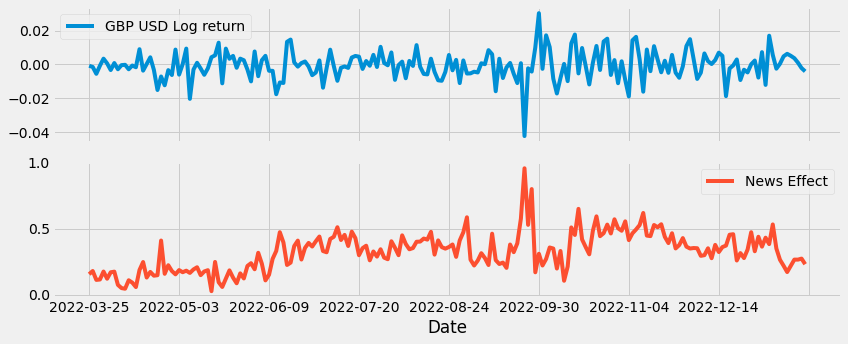

In [ ]:
df_use1.plot(subplots=True, figsize=(12,5))
plt.tight_layout()
plt.show()


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 23, Mar, 2023
Time:                     17:47:14
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -13.9738
Nobs:                     198.000    HQIC:                  -14.0727
Log likelihood:           847.952    FPE:                7.22969e-07
AIC:                     -14.1399    Det(Omega_mle):     6.87794e-07
--------------------------------------------------------------------
Results for equation GBP USD Log return
                           coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------------------
const                        -0.000400         0.001574           -0.254           0.799
L1.GBP USD Log return         0.032649         0.071663            0.456           0.649
L1.News Effect 

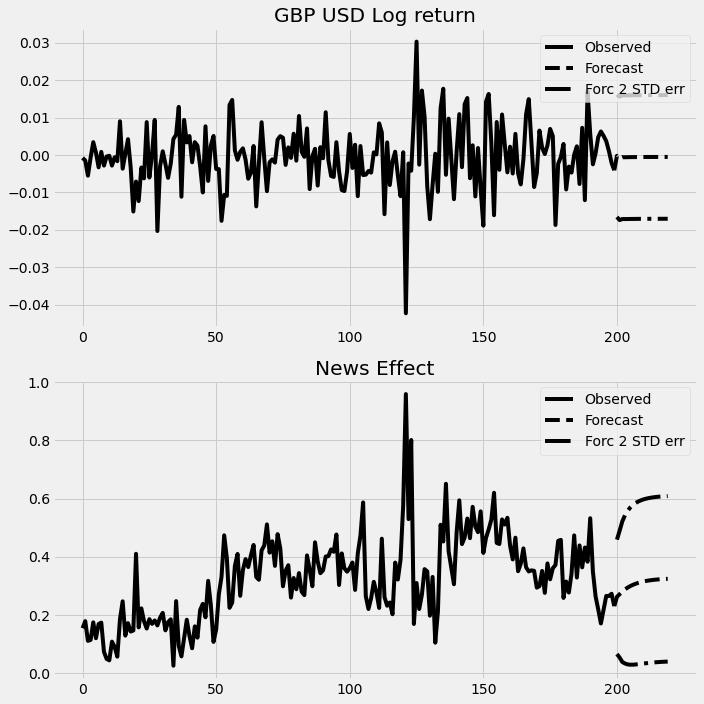

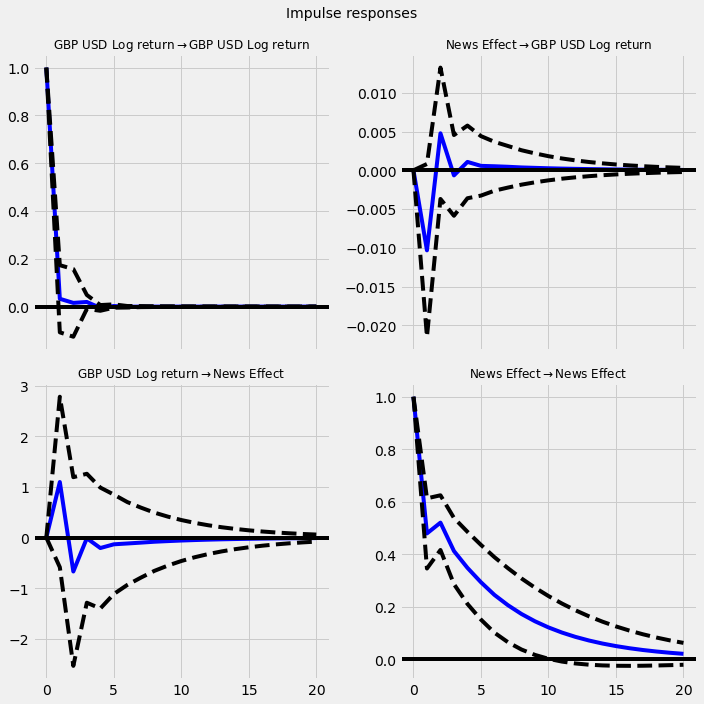

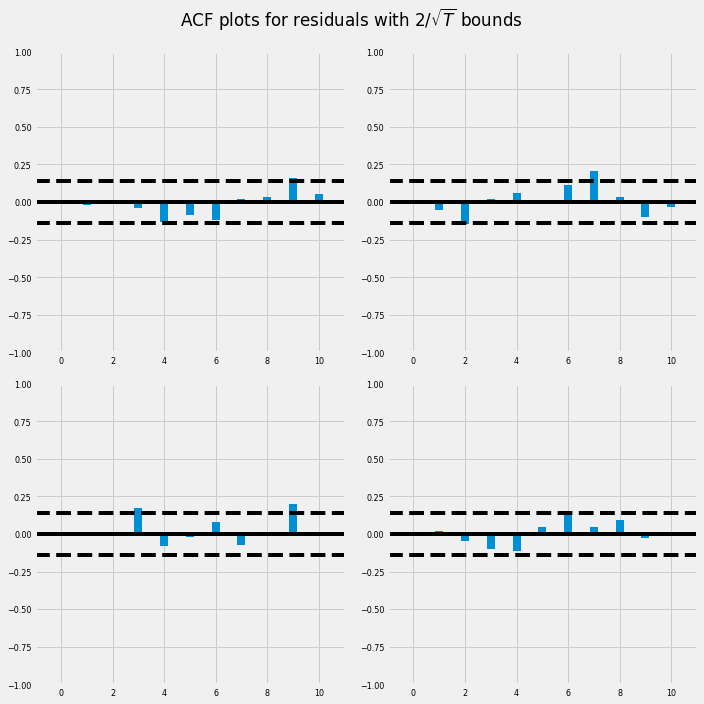

In [ ]:
# VAR 모형적합
model_var = VAR(df_use1).fit(maxlags=2)
display(model_var.summary())

# # 예측 및 시각화
forecast_num = 20
model_var.plot_forecast(forecast_num)
plt.tight_layout()
plt.show()

# 임펄스반응함수 추정
model_var.irf(forecast_num).plot()
plt.tight_layout()
plt.show()

# 잔차진단
model_var.plot_acorr()
plt.tight_layout()
plt.show()

In [ ]:
df_use1 = df_use.iloc[:,[, 14 ]]
df_use1